In [1]:
!pip install tensorflow==2.15.1 tensorflow-hub tensorflow-text==2.15.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 43.8 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import numpy as np

In [3]:
text.__version__

'2.15.0'

In [4]:
tf.__version__

'2.15.1'

In [5]:
hub.__version__

'0.16.1'

In [3]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [4]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

In [5]:
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(3, activation='softmax', name="output")(l)

In [6]:
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [7]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_word_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             , 'input_type_ids': (None,                                           
                              128)}                                                               
                                                                                              

In [8]:
METRICS = [
      tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=METRICS)

In [9]:
import pandas as pd

data = pd.read_csv('all-data.csv', encoding='latin-1', names=['sentiment', 'text'])
data.head()

,sentiment,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


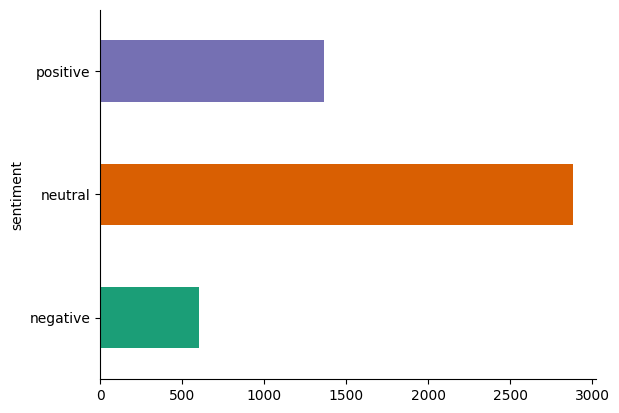

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [11]:
from keras.utils import to_categorical

from sklearn import preprocessing
label = preprocessing.LabelEncoder()

y = label.fit_transform(data['sentiment'])
y = to_categorical(y)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['text'], y, test_size=0.2)

In [13]:
model.fit(X_train, y_train, epochs=30)

Epoch 1/30
122/122 [==============================] - 54s 338ms/step - loss: 0.9512 - accuracy: 0.5717 - precision: 0.6066 - recall: 0.4755
Epoch 2/30
122/122 [==============================] - 44s 360ms/step - loss: 0.8758 - accuracy: 0.5996 - precision: 0.6435 - recall: 0.5057
Epoch 3/30
122/122 [==============================] - 42s 347ms/step - loss: 0.8364 - accuracy: 0.6125 - precision: 0.6599 - recall: 0.5181
Epoch 4/30
122/122 [==============================] - 43s 355ms/step - loss: 0.8080 - accuracy: 0.6293 - precision: 0.6892 - recall: 0.5276
Epoch 5/30
122/122 [==============================] - 42s 348ms/step - loss: 0.7880 - accuracy: 0.6391 - precision: 0.6967 - recall: 0.5470
Epoch 6/30
122/122 [==============================] - 43s 351ms/step - loss: 0.7879 - accuracy: 0.6416 - precision: 0.6876 - recall: 0.5418
Epoch 7/30
122/122 [==============================] - 43s 349ms/step - loss: 0.7774 - accuracy: 0.6481 - precision: 0.7010 - recall: 0.5686
Epoch 8/30
122/122 [

In [14]:
predictions = model.predict(X_test)
predictions

31/31 [==============================] - 11s 341ms/step


array([[0.07272261, 0.56777   , 0.35950735],
       [0.6634672 , 0.16778679, 0.168746  ],
       [0.08157004, 0.8065179 , 0.11191203],
       ...,
       [0.3311094 , 0.3020166 , 0.36687395],
       [0.36172515, 0.554337  , 0.08393784],
       [0.03768121, 0.87667525, 0.0856435 ]], dtype=float32)

In [15]:
model.evaluate(X_test, y_test)

31/31 [==============================] - 12s 357ms/step - loss: 0.6772 - accuracy: 0.7124 - precision: 0.7469 - recall: 0.6268


[0.6772311925888062,
 0.7123711109161377,
 0.7469287514686584,
 0.6268041133880615]

In [20]:
model.save('dl_model_2.h5')

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
